In [5]:
from rdkit import Chem as chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem as allchem
from PIL import Image
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#import matplotlib
#%matplotlib inline
import seaborn as sns
sns.set(style='ticks', context='notebook', font_scale=1.2)

In [6]:
# load beta-secretase 1 inhibitors
df_bace = pd.read_csv('bace.csv')
df_bace['rdkit_mol'] = [chem.MolFromSmiles(s) for s in df_bace['mol']]
print(df_bace.shape)
print(df_bace.columns)
df_bace.head()

(1513, 596)
Index(['mol', 'CID', 'Class', 'Model', 'pIC50', 'MW', 'AlogP', 'HBA', 'HBD',
       'RB',
       ...
       'PEOE7 (PEOE7)', 'PEOE8 (PEOE8)', 'PEOE9 (PEOE9)', 'PEOE10 (PEOE10)',
       'PEOE11 (PEOE11)', 'PEOE12 (PEOE12)', 'PEOE13 (PEOE13)',
       'PEOE14 (PEOE14)', 'canvasUID', 'rdkit_mol'],
      dtype='object', length=596)


,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID,rdkit_mol
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,5,...,78.640335,226.85541,107.43491,37.133846,0.000000,7.980170,0.0,0.000000,1,<rdkit.Chem.rdchem.Mol object at 0x7ff4773bbf80>
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,1,Train,8.853872,657.81073,2.6412,5,4,16,...,47.171600,365.67694,174.07675,34.923889,7.980170,24.148668,0.0,24.663788,2,<rdkit.Chem.rdchem.Mol object at 0x7ff4773bb6c0>
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,1,Train,8.698970,591.74091,2.5499,4,3,11,...,47.941147,192.40652,255.75255,23.654478,0.230159,15.879790,0.0,24.663788,3,<rdkit.Chem.rdchem.Mol object at 0x7ff4773bb710>
3,S1(=O)(=O)C[C@@H](Cc2cc(O[C@H](COCC)C(F)(F)F)c...,BACE_4,1,Train,8.698970,591.67828,3.1680,4,3,12,...,37.954151,194.35304,202.76335,36.498634,0.980913,8.188327,0.0,26.385181,4,<rdkit.Chem.rdchem.Mol object at 0x7ff4773bbb70>
4,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_5,1,Train,8.698970,629.71283,3.5086,3,3,11,...,39.361153,179.71288,220.46130,23.654478,0.230159,15.879790,0.0,26.100143,5,<rdkit.Chem.rdchem.Mol object at 0x7ff4773bbda0>


In [10]:
# load the Abl kinase inhibitors
df_abl_reg = pd.read_csv('../chemprop/regression.csv')
df_abl_cla = pd.read_csv('../chemprop/classification.csv')

print(df_abl_reg.shape, df_abl_cla.shape)
print(df_abl_reg.columns)
print(df_abl_cla.columns)
df_abl_reg.head()

(71, 2) (96, 2)
Index(['molecule_smi', 'abl1_pIC50'], dtype='object')
Index(['molecule_smi', 'synthesis_success'], dtype='object')


,molecule_smi,abl1_pIC50
0,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,8.045757
1,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,8.065502
2,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,9.698970
3,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,8.638272
4,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,7.045757


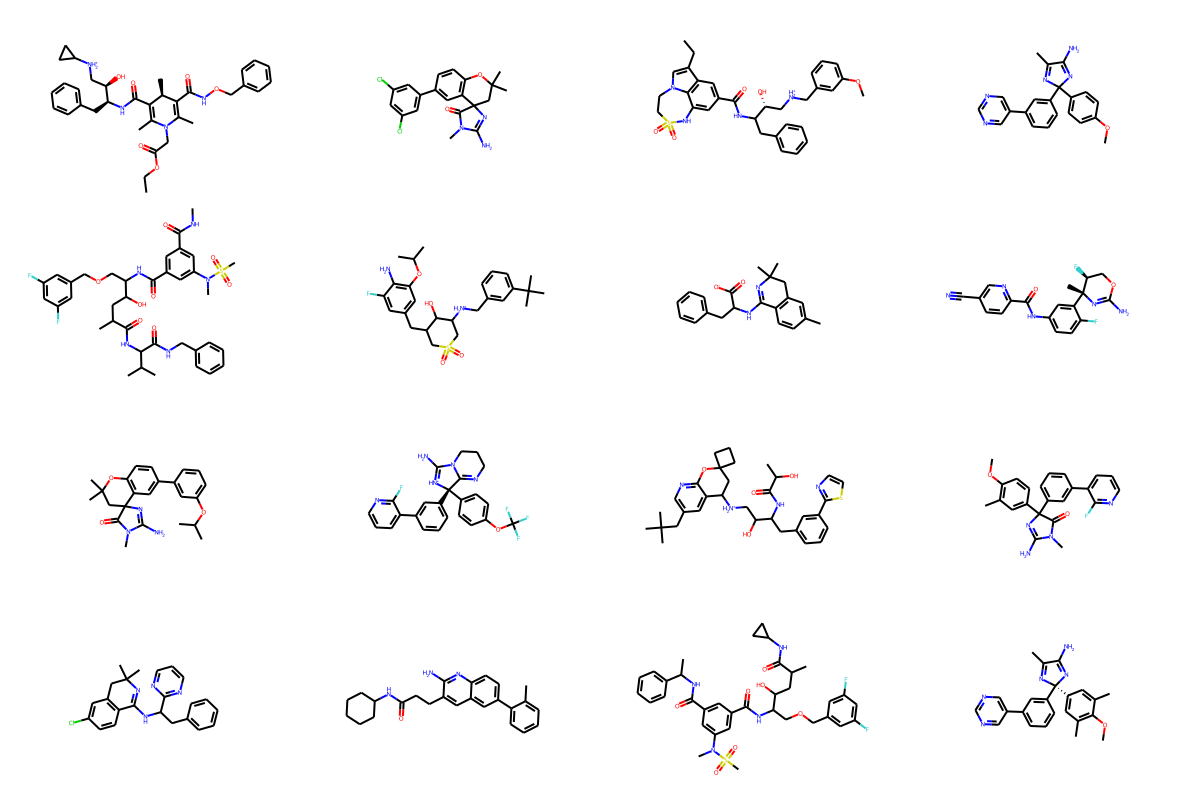

In [7]:
# draw these molecule
# img = Draw.MolsToGridImage(df_bace['rdkit_mol'][:20], molsPerRow=4, subImgSize=(300, 300), maxMols=300)
# png = img.data
# with open('all_momlecules.png', 'wb+') as outf:
#     outf.write(png)

Draw.MolsToGridImage(np.random.choice(df_bace['rdkit_mol'], size=16), molsPerRow=4, subImgSize=(300, 200))
    

<AxesSubplot:xlabel='pIC50', ylabel='Density'>

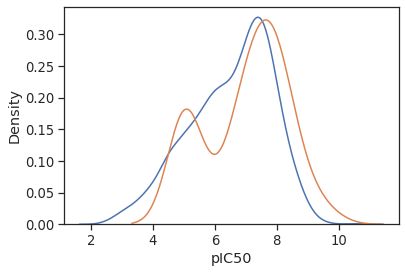

In [12]:
sns.kdeplot(df_bace['pIC50'])
sns.kdeplot(df_abl_reg['abl1_pIC50'])